In [1]:
import os
project_dir = "c:/Users/sqin34/OneDrive - UW-Madison/Research/solvgnn/"
os.chdir(project_dir)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def cum_err(output,n_bin=1000):
    output['err1'] = np.abs(output['true_gam1'] - output['pred_gam1'])
    output['err2'] = np.abs(output['true_gam2'] - output['pred_gam2'])
    output['err'] = (output['err1']+output['err2'])/2
    values,base = np.histogram(output['err'],bins=n_bin)
    cumulative = np.cumsum(values)/np.sum(values)
    return [base,cumulative]

In [4]:
saved_model_dir_solvcat_bi = project_dir + "results/job_220822_solvcat_binary_catx_randflip/"
saved_model_dir_solvgcn_bi = project_dir + "results/job_220814_solvgcn_binary_catx/"
saved_model_dir_solvgnn_bi = project_dir + "results/job_220811_solvgnn_binary_catx/"
saved_model_dir_solvcat_ter = project_dir + "results/job_220822_solvcat_ternary_catx_randflip/"
saved_model_dir_solvgcn_ter = project_dir + "results/job_220814_solvgcn_ternary_catx/"
saved_model_dir_solvgnn_ter = project_dir + "results/job_220811_solvgnn_ternary_catx/"

In [5]:
solvcat_bi = pd.read_csv(saved_model_dir_solvcat_bi + "analysis/output_cv.csv")
solvgcn_bi = pd.read_csv(saved_model_dir_solvgcn_bi + "analysis/output_cv.csv")
solvgnn_bi = pd.read_csv(saved_model_dir_solvgnn_bi + "analysis/output_cv.csv")
solvcat_ter = pd.read_csv(saved_model_dir_solvcat_ter + "analysis/output_cv.csv")
solvgcn_ter = pd.read_csv(saved_model_dir_solvgcn_ter + "analysis/output_cv.csv")
solvgnn_ter = pd.read_csv(saved_model_dir_solvgnn_ter + "analysis/output_cv.csv")

In [53]:
base,cumulative = cum_err(solvgcn_ter)
print(base[5:15])
print(cumulative[5:15])

[0.05311301 0.06369588 0.07427875 0.08486163 0.0954445  0.10602737
 0.11661025 0.12719312 0.13777599 0.14835886]
[0.1568125  0.19115625 0.2244     0.2562625  0.28688125 0.31645
 0.34509375 0.37295625 0.399      0.42399375]


In [56]:
solvgcn_ter.err.mean()

0.3030238109505173

In [71]:
mixture_type_err = []
for i in range(3):
    err = solvgnn_bi[solvgnn_bi.tpsa_binary_avg==i].err.mean()
    mixture_type_err.append(err)
    print(err)
print(np.std(np.array(mixture_type_err)))

0.017052231029885456
0.024188100722183963
0.030964870950806987
0.00568044208536072


In [72]:
conc_type_err = []
for i in [(0.1, 0.9), (0.5, 0.5)]:
    err = solvgnn_bi[(solvgnn_bi.solv1_x==i[0]) | (solvgnn_bi.solv1_x==i[1])].err.mean()
    conc_type_err.append(err)
    print(err)
print(np.std(np.array(conc_type_err)))

0.033324767320320574
0.02285899642954706
0.005232885445386757


In [68]:
solvgnn_ter[(solvgnn_ter.solv1_x==0.15) | (solvgnn_ter.solv1_x==0.7)].err.std()

0.050724897517368174

In [6]:
labels = ['SolvCAT','SolvGCN','SolvGNN']
linestyles = ['dotted','dashed','solid']

In [7]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family':'serif',
    'font.serif':['Computer Modern'],
    'axes.labelsize':10,
    'xtick.labelsize':9,
    'ytick.labelsize':9})

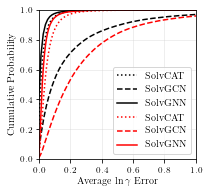

In [12]:
fig,ax = plt.subplots(figsize=(3,2.8))
ax.grid(color='lightgray',linewidth=0.75,alpha=0.5)
gnn_arch = [solvcat_bi,solvgcn_bi,solvgnn_bi]
for i,output in enumerate(gnn_arch):
    base,cumulative = cum_err(output)
    ax.plot(base[:-1],cumulative,label=labels[i],linestyle=linestyles[i],c='black')
gnn_arch = [solvcat_ter,solvgcn_ter,solvgnn_ter]
for i,output in enumerate(gnn_arch):
    base,cumulative = cum_err(output)
    ax.plot(base[:-1],cumulative,label=labels[i],linestyle=linestyles[i],c='r')
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_xlabel('Average $\ln\gamma$ Error')
ax.set_ylabel('Cumulative Probability')
plt.legend()
plt.tight_layout()
plt.savefig(saved_model_dir_solvgnn_bi + '/analysis/model_cumfreq_comparison_overlay.svg',pad_inches=0,dpi=400,transparent=True)   